## CS102 - Further Computing

Mark Howard<br>
School of Mathematical & Statistical Sciences<br>
NUI Galway<br>
mark.howard@nuigalway.ie


### 1. Aspects of Scientific Computing

# Week 3:<br/> Structure of `numpy` arrays: Attributes, Indexing, Reshaping. <br/> Computing on `numpy` arrays: Universal Functions

* `numpy` arrays improve on `python` lists in many ways.
* `numpy` arrays are **homogeneous** **multi-dimensional** collections of data.
* As such, a `numpy` array has:
    * a **shape**, specifying its size in each dimension;
    * a common **data type** for all its elements.
* These (and related) **attributes** of an array can be directly accessed.
* Basic manipulation of the data in an array involves **indexing** to access single elements
  and **slicing** to access subarrays.
* `numpy` extends `python`s set of indexing and slicing operators.
* The **shape** of a `numpy` array can be **modified**, without affecting the data it contains.
* Multiple arrays can be **combined** into one.
* Conversely, and array can be **split** into multiple parts.  

Each array has the attributes 
* `dtype`: the **data type** of the array.
* `shape`: the **size in each dimension**, and

Other attributes include 
* `itemsize`, which lists the size (in bytes) of each array element, and 
* `nbytes`, which lists the total size (in bytes) of the array.

In [ ]:
import numpy as np

In [ ]:
x3 = np.random.randint(10, size=(2, 3, 4))  # Three-dimensional: shape 2 x 3 x 4
x3

In [ ]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

* In general, `nbytes` should be equal to `itemsize` times `size`.

Let's show an advantage of using Numpy over pure python

From the docs on `sys.getsizeof`: "Return the size of an object in bytes. The object can be any type of object."
* "All built-in objects will return correct results, but **this does not have to hold true for third-party extensions as it is implementation specific.**" 
* **"Only the memory consumption directly attributed to the object is accounted for, not the memory consumption of objects it refers to."**

In [ ]:
from sys import getsizeof
# declaring a list of 1000 elements 
S= range(1000)

print("Size of the list+container in bytes: ", sum(getsizeof(x) for x in S) + getsizeof(S))
  
# declaring a Numpy array of 1000 elements 
D= np.arange(1000)
  
# printing size of each element of the Numpy array
print("Size of each element of the Numpy array in bytes: ",D.itemsize)
  
# printing size of the whole Numpy array
print("Size of the whole Numpy array in bytes: ",D.size*D.itemsize)
print("Size of the whole Numpy array in bytes: ",D.nbytes)

Let's show another advantage of using Numpy over pure python (more on this later)

In [ ]:
size_of_vec = 1000
Xp = range(size_of_vec)
Yp = range(size_of_vec)
Xn = np.arange(size_of_vec)
Yn = np.arange(size_of_vec)

In [ ]:
# Pure python
%timeit Zp = [Xp[i] + Yp[i] for i in range(len(Xp)) ]

In [ ]:
# Using Numpy
%timeit Zn = Xn + Yn

`NumPy` gives a significant performance boost over pure Python lists for most tasks

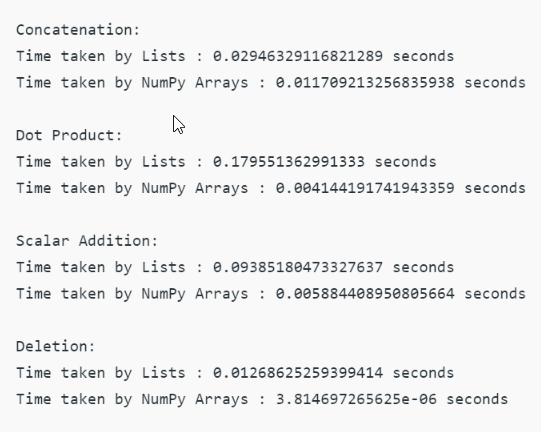

##  Exercises


1.  Construct a `numpy` $3 \times 3 \times 3$ array of $1$s (of type `int`).

2. Construct a `numpy` $3 \times 4 \times 5$ array of random integers
   in the range $1$ to $99$ (inclusive).
   
3. Create an array of $21$ values, evenly spaced between $0$ and $100$.

4. Create an array with a sequence of integers,
   starting at $1950$, ending at $2015$, stepping by $5$.
   
5. Create a list of all odd squares between $0$ and $10000$.

6. Make a few `numpy` arrays, with random entries or ranges of integers, of varying dimensions.

7. Determine the basic attributes of these arrays.

## Indexing: Accessing Single Elements

* In a one-dimensional array, the $i^{th}$ value (counting from **zero**) can be accessed by specifying the desired index in square brackets, just as with `python` lists:

In [ ]:
x1 = np.random.randint(10, size=4)  # One-dimensional array; size means shape
x1

In [ ]:
x1[0]

In [ ]:
x1[3]

* To index from the end of the array, you can use **negative** indices:

In [ ]:
x1[-1]

In [ ]:
x1[-2]

* In a **multi-dimensional** array, items can be accessed using **comma-separated indices**:

In [ ]:
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array: shape 3 x 4

In [ ]:
x2

In [ ]:
x2[0, 0]

In [ ]:
x2[2, -1]

* Values can also be **modified** using the above index notation:

In [ ]:
x2[0, 0] = 12
x2

* **NOTE:** `numpy` arrays have a **fixed type**.
* Assigning objects of a different type into an array will either result in an **error**, or
  in a **silent type conversion**.

In [ ]:
x1[0] = 3.14159  # this will be truncated!
x1

In [ ]:
a = np.array(["ABC", "CDE"])

In [ ]:
a[0] = 1

In [ ]:
a

In [ ]:
x1

The command
```python
x1[1] = "abc"
```
would result in an error ...

In [ ]:
x1[1]="abc"

## Slicing: Accessing Subarrays

* The `numpy` slicing syntax follows that of the standard `python` list.
* To access a slice of an array ``x``, use
``` python
x[start:stop:step]
```
where the `:step` part is optional.
* If any of these are unspecified, they default to the values 
$0$ for `start`, the size (of the dimension) for `stop`, and $1$ for `step`.

### One-dimensional slicing

In [ ]:
x = np.arange(10)
x

In [ ]:
x[:5]  # first five elements

In [ ]:
x[5:]  # elements after index 5

* The `numpy` slicing syntax follows that of the standard `python` list.
* To access a slice of an array ``x``, use
``` python
x[start:stop:step]
```
where the `:step` part is optional.
* If any of these are unspecified, they default to the values 
$0$ for `start`, the size (of the dimension) for `stop`, and $1$ for `step`.

In [ ]:
x[4:7]  # middle sub-array

In [ ]:
x[::2]  # every other element

In [ ]:
x[1::2]  # every other element, starting at index 1

* **Note:** When the `step` value is **negative**, the defaults for `start` and `stop` are **swapped**.
* This gives a convenient way to reverse an array

In [ ]:
x[::-1]  # all elements, reversed

In [ ]:
x[7::-2]  # reversed every other from index 7 down to 0

### Multi-dimensional slicing

* Multi-dimensional slices work similarly, with multiple **slices separated by commas**.

In [ ]:
x2

In [ ]:
x2[:2, :3]  # two rows, three columns

In [ ]:
x2[:, ::2]  # all rows, every other column

In [ ]:
x2[::-1, ::-1]  # reversing both rows and cols

### Accessing array rows and columns

* Single rows or columns of an array can be accessed by **combining indexing and slicing**.

In [ ]:
x2

In [ ]:
x2[:, 0]  # first column of x2

In [ ]:
x2[0, :]  # first row of x2

* Trailing empty slices can be omitted.

In [ ]:
x2[0]  # equivalent to x2[0, :]

### Subarrays are no-copy views!

* Recall that, for a `python` list `l`, the slice `l[:]` is a convenient way of making a copy of the list `l`.
* **CAUTION:** Array slices are **views** rather than **copies** of the array data.
* This means that they refer to (and modify) the same underlying data as the original array.

In [ ]:
x2 = np.random.randint(10, size=(3, 4))
print(x2)

* Let's extract a $2 \times 2$ subarray from this:

In [ ]:
x2_sub = x2[:2, :2]
print(x2_sub)

* Now we modify this subarray.

In [ ]:
print(x2)
print(x2_sub)

In [ ]:
x2_sub[0, 0] = 99
print(x2_sub)

* As a side-effect, the original array is changed, too!

In [ ]:
print(x2)

* When working with **large datasets**, this behaviour allows us to access and process pieces of these datasets without the need to copy the entire underlying data buffer.

### Creating copies of arrays

* To make an explicit copy of the data within an array or a subarray use the `copy()` method:

In [ ]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

* Modify this copied subarray:

In [ ]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

* Now the original array is not affected:

In [ ]:
print(x2)

## Reshaping of Arrays

* Another useful type of operation is reshaping of arrays.
* The most flexible way of doing this is with the `reshape` method.
* For example, to put the numbers 1 through 9 into a $3 \times 3$ matrix grid, you can do the following:

In [ ]:
grid = np.arange(1, 10).reshape(3, 3)
print(grid)

* Note that for this to work, the **size** of the initial array **must match** the size of the reshaped array. 
* **CAUTION:** Where possible, the ``reshape`` method will use a **no-copy view** of the initial array.

`newaxis`
* A shape of `(3)` is **different** from a shape of `(1,3)` or `(3,1)`.
* Thus, a common reshaping pattern is the **conversion** of a one-dimensional array into a two-dimensional **row** or **column matrix**.
* This can be done with the `reshape` method, or by making use of the `np.newaxis` keyword within a slice operation:

In [ ]:
x = np.array([1, 2, 3])
print(x.shape)

In [ ]:
# row vector via reshape
x.reshape(1, 3)

In [ ]:
print(x.shape)
print((x.reshape(1, 3)).shape)

### `newaxis`
* A shape of `(3)` is **different** from a shape of `(1,3)` or `(3,1)`.
* Thus, a common reshaping pattern is the **conversion** of a one-dimensional array into a two-dimensional **row** or **column matrix**.
* This can be done with the `reshape` method, or by making use of the `np.newaxis` keyword within a slice operation:

In [ ]:
x

In [ ]:
# row vector via newaxis
x[np.newaxis, :]

In [ ]:
print(x.shape)
print((x[np.newaxis, :]).shape)

### `newaxis`
* A shape of `(3)` is **different** from a shape of `(1,3)` or `(3,1)`.
* Thus, a common reshaping pattern is the **conversion** of a one-dimensional array into a two-dimensional **row** or **column matrix**.
* This can be done with the `reshape` method, or by making use of the `np.newaxis` keyword within a slice operation:

In [ ]:
# column vector via reshape
x.reshape(3, 1)

In [ ]:
# column vector via newaxis
x[:, np.newaxis]

* We will make frequent use of this type of transformation.

## Array Concatenation and Splitting; Axis

* It's also possible to combine multiple arrays into one.
* Conversely, it's possible to split a single array into multiple arrays.
* Usually, the **direction** of such an operation needs to be specified as an `axis` parameter.

### Concatenation of arrays

* Concatenation, or joining of two arrays in `numpy`, is accomplished by using `np.concatenate`.
* `np.concatenate` takes a **tuple or list of arrays** as its first argument.

In [ ]:
x = np.array([1, 2, 3, 4])
y = np.array([3, 2, 1])
np.concatenate([x, y])

* You can also concatenate more than two arrays at once:

In [ ]:
z = [99, 99]
np.concatenate([x, y, z])

* Two-dimensional arrays can be concatenated **horizontally** or **vertically**.
* The (optional) `axis` keyword argument specifies the **axis**.

In [ ]:
matrix = np.arange(1,7).reshape(2,3)
matrix

In [ ]:
row = np.array([[0,0,0]])
row

In [ ]:
print("mat: ", matrix.shape)
print("row: ", row.shape)

In [ ]:
# concatenate along the first axis (default: 0)
vert = np.concatenate([row, matrix])
vert

* In the **axis dimension**, the size of resulting matrix is the **sum** of the sizes of the input matrices.
* In all other dimensions, the input matrices must have the **same size**.

In [ ]:
vert.shape

In [ ]:
print("mat: ", matrix.shape)
print("row: ", row.shape)

* Changing the order of arguments places the _row_ below the _matrix_

In [ ]:
np.concatenate([matrix,row])

* Horizontally:

In [ ]:
col = np.array([99,99])[:, np.newaxis]
col

In [ ]:
print("mat: ", matrix.shape)
print("col: ", col.shape)

In [ ]:
# concatenate along the second axis (zero-indexed)
horiz = np.concatenate([col, matrix], axis=1)
horiz

In [ ]:
horiz.shape

* There are a few related methods with similar functionality in `numpy`.

### Splitting of arrays

* The opposite of concatenation is splitting, implemented by the `np.split` function.  
* Again we need to indicate an `axis` for the direction of the splitting.
* Additionally, we need to give the number of parts, or we can pass a list of indices giving the split points:

In [ ]:
x = np.arange(12)
x

In [ ]:
np.split(x, 3)

In [ ]:
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

* Notice that $N$ split-points, leads to $N + 1$ subarrays.

Two-dimensional split:

In [ ]:
x = x.reshape(3,4)
x

In [ ]:
np.split(x, 3)

In [ ]:
np.split(x, 2, axis=1)

In [ ]:
first_bit,second_bit=np.split(x, 2, axis=1)
print(first_bit)
print(second_bit)

* There are a few similar functions in the `numpy` package.

## References

### `python`
* `l[i]`: indexing [[doc]](https://docs.python.org/3/library/stdtypes.html?highlight=mutable%20sequence#sequence-types-list-tuple-range)
* `l[start:stop:step]`: slicing [[doc]](https://docs.python.org/3/library/stdtypes.html?highlight=mutable%20sequence#sequence-types-list-tuple-range)
* `slice` [[doc]](https://docs.python.org/3/library/functions.html#slice)

### `numpy`
* indexing, slicing and `newaxis`: [[doc]](https://numpy.org/doc/stable/reference/arrays.indexing.html)
* `reshape`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)
* `concatenate`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)
* `split`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

## Exercises
1. Starting with a $1$-dimensional array of length $60$,
   reshape it into a $3$-dimensional array with dimensions
   of sizes $5$, $4$ and $3$, respectively.
2. Then split the array along the second dimenson,
   the one of size $4$, into two halves.
3. What does `np.newaxis` mean, and what is it used for?

## Universal Functions and Broadcasting.
* `numpy` provides efficient **storage** for homogeneous
  multidimensional data.
* `numpy` also provides efficient **operations** on such data.
* Some of these **vectorized** operations are implemented as 
  **universal functions**, or **UFuncs** for short.
* **Broadcasting** is a set of rules for applying binary UFuncs on arrays of different sizes.

## `python`'s  Loops  are slow

* Due to the dynamic, interpreted nature of the language
  certain sequences of operations cannot be compiled into efficient 
  machine code as in languages like `C` and `Fortran`.

* In situations where many small operations are being repeated. for instance when looping over an array,
`python` has to repeat certain checks for each element in the array.

* Some of those checks become unnecessary, when it is known in advance
  that all elements in the array have the same type.

### Example

* For example, let's compute the reciprocals of an array of values.
* We start with defining a `python` function `compute_reciprocals` that takes 
  a list `values` as input and produces the list of reciprocals as output,
  using a simple `for` loop

In [ ]:
def compute_reciprocals(values):
    output = np.empty(len(values))#why is this line a good idea?
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output       

* We prepare a list of 5 random integer values (between $1$ and $9$) ...

In [ ]:
values = np.random.randint(1, 10, size=5)
values

* ... and apply our function.

In [ ]:
compute_reciprocals(values)

* Note how the code makes use of the efficient `numpy` data
  structures and how it avoids the need for resizing
  the `output` array.
  
* Now let's time the operation for a bigger array, one with a million elements:

In [ ]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

* It takes more than a second to compute these 1 million reciprocals
  and to store the result!

* For today's standards, that's a long time ...

## Introducing UFuncs

* For this and many other types of operations on arrays, `numpy` provides a **vectorized** 
  alternative.

* This vectorized approach is designed to push the loop into the compiled layer that underlies `numpy`, leading to **much faster** execution.

* A **UFunc** (universal function) is easy to use: simply perform the operation on the array.

In [ ]:
1.0 / values

* Now we time the UFunc applied to the list of a million values:

In [ ]:
%timeit 1.0 / big_array

* `ms` here stands for millisecond.  That is one 1000th of a second!

* So the UFunc is **faster by a factor 1000**!! That's 3 orders of magnitude ...

* UFuncs are extremely flexible: they work for example with two arrays of the same shape:

In [ ]:
np.arange(5) / np.arange(1, 6)

* UFunc operations can also act on multi-dimensional arrays:

In [ ]:
x = np.arange(9).reshape((3, 3))
2 ** x

* UFuncs are nearly always more efficient than `Python` loops, especially as the arrays grow in size.

## Exploring `numpy`'s UFuncs

* All of `python`s standard operators, **unary** operators, which operate on a single input, and **binary** operators, which operate on two inputs, have a corresponding UFunc in `numpy`.  In most cases these can be conveniently accessed through the same symbol.

### Array arithmetic

* `numpy`'s UFuncs make use of `Python`'s native arithmetic operators,
e.g., for addition, subtraction, multiplication, and division (all binary).

In [ ]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division (related to % )
print("x % 2 =", x % 2)  # modulo (related to // )

* There is also a unary ufunc for negation, and a ``**`` operator for exponentiation, and a ``%`` operator for modulus:

In [ ]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

* UFuncs can be strung together, and the standard order of operations is respected:

In [ ]:
-(0.5*x + 1) ** 2

* Each of these arithmetic operations are simply convenient wrappers around specific functions built into `NumPy`; for example, the `+` operator is a wrapper for the `add` function:

In [ ]:
np.add(x, 2)

* The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent Ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|
|`abs`          |`np.absolute`        |Absolute value (e.g., `abs(-3) = 3`)   |

* Additionally there are Boolean/bitwise operators ... 

### Trigonometric functions

In [ ]:
theta = np.linspace(0, np.pi, 3)
theta

* Compute some trigonometric functions on these values:

In [ ]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

* The values are computed to within machine precision: some zero 
values do not always hit exactly zero.

In [ ]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

### Exponents and Logarithms

* The function `np.exp` yields the exponential (base $e$), `np.exp2` yields $2^x$, and other exponentials can be computed with `np.power`.

In [ ]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

* The function `np.log` gives the natural logarithm,
`np.log2` the the base-2 logarithm 
and `np.log10` the base-10 logarithm.

In [ ]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

## Advanced UFunc Features

### Specifying output

* For large calculations, it is sometimes useful 
  or even necessary
  to specify the array where the result
  of the calculation will be stored.

* For all UFuncs, this can be done with the
  `out` argument of the function:

In [ ]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

* This also works with array views. For example, to write the results of a computation to every other element of a specified array:

In [ ]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

* Note that the code `y[::2] = 2 ** x` results in the creation of a temporary array to hold the results of `2 ** x`, followed by a second operation copying those values into the ``y`` array.

### Aggregates and Accumulations

* An **aggregate** is a whole formed by combining several separate elements.

* Binary UFuncs can be used to compute **aggregates** directly from the object.

* A **reduce operation** repeatedly applies a given operation to the elements of an array until only a single result remains.

* To reduce an array with a particular operation, use the `reduce`
  method of the corresponding UFunc.

* For example, calling `reduce` on the `add` UFunc returns
  the sum of all elements in the array:

In [ ]:
x = np.arange(1, 6)
np.add.reduce(x)

* Similarly, calling `reduce` on the `multiply` ufunc results in the 
  product of all array elements:

In [ ]:
np.multiply.reduce(x)

* To store and return all the intermediate results of the computation, 
  use `accumulate` instead:

In [ ]:
np.add.accumulate(x)

In [ ]:
np.multiply.accumulate(x)

* In fact, for these particular cases, `numpy` has dedicated functions ``np.sum``, ``np.prod``, ``np.cumsum``, ``np.cumprod`` ...

## UFuncs in higher dimensions

* Binary UFunc operations can be applied to two arrays of the **same shape**.
* Here, the operation will simply be applied to elements in corresponding positions in the two arrays,
  resulting in a new array of the **same shape**.

* Here is a product of a $1$-dim'l `x` with itself.

In [ ]:
np.multiply(x, x)

* Now for a $2$-dim'l array `a`.

In [ ]:
a = np.arange(12).reshape(3,4)
a

* Add it to itself ...

In [ ]:
a + a

* ... and multiply it with itself:

In [ ]:
a * a

<div class="alert alert-danger">

* **CAUTION:** note that this kind of multiplication of `numpy` arrays is **very different** from the matrix multiplication in Linear Algebra.
</div>

## Broadcasting

* UFuncs can even operate between arrays of **different shapes** and **sizes**, via a convention known as **broadcasting** ...

* Broadcasting is a **set of rules** for applying binary UFuncs on arrays of different sizes.

* Recall: for arrays of the same shape, binary operations are performed on an element-by-element basis:

In [ ]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

* The same result is obtained by adding the **scalar** $5$
  (a zero-dimensional array) to the array `a`.

In [ ]:
a + 5

* Think of this as an operation that first stretches or duplicates the value `5` into the array `[5, 5, 5]`, and then adds the two arrays
of the same shape.

* Inside `numpy`, this duplication of values does not actually take place, but it helps to describe how broadcasting works.

* The concept extends to arrays of higher dimension, e.g, the sum
  of a one-dimensional array (a matrix) and a two-dimensional array
  (a vector):

In [ ]:
M = np.ones((3, 3))
M

In [ ]:
M + a

* Here the one-dimensional array `a` is stretched, or broadcast across the second dimension in order to match the shape of `M`.

* More complicated cases can involve broadcasting of both arrays
  in order to yield a common shape.
  
* The sum of a row vector and a column vector, for example:

In [ ]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)
a + b

## Rules of Broadcasting

Broadcasting in `NumPy` follows a **strict set of rules** to determine the interaction between the two arrays:

- **Rule 1:** If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is **padded** with ones on its leading (left) side.
- **Rule 2:** If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- **Rule 3:** If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

### Broadcasting example 1

Let's look at adding a two-dimensional array to a one-dimensional array:

In [ ]:
M = np.ones((2, 3))
a = np.arange(3)

In [ ]:
M.shape

In [ ]:
a.shape

The shapes of the arrays are

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

Rule 1: the array ``a`` has fewer dimensions, so we pad it on the left with ones:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

Rule 2: the first dimension disagrees, so we stretch this dimension to match:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and the final shape will be ``(2, 3)``:

In [ ]:
M + a

### Broadcasting example 2

* Let's take a look at an example where **both arrays need to be broadcast**:

In [ ]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1: pad the shape of ``b`` with ones:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

Rule 2: upgrade **each** of these ones to match the corresponding size of the other array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible.

In [ ]:
a + b

### Broadcasting example 3

* Finally, let's take a look at an example in which the two arrays are not compatible:

In [ ]:
M = np.ones((3, 2))
a = np.arange(3)

The matrix ``M`` is transposed, compared to the first example.
The shapes of the arrays now are

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Rule 1: pad the shape of ``a`` with ones:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

Rule 2: the first dimension of ``a`` is stretched to match that of ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Rule 3: the final shapes do not match, so these two arrays are incompatible.

* The command
```python
M + a
```
would now result in an error ...

* If right-side padding is really needed, one can always reshape the array explicitly:

In [ ]:
a[:, np.newaxis].shape

In [ ]:
M + a[:, np.newaxis]

* The examples have focused on the ``+`` operator.
* These broadcasting rules apply to **any** binary ``ufunc``.
* For an exotic example, here is the ``logaddexp(a, b)`` function, which computes ``log(exp(a) + exp(b))`` with more precision than the naive approach:

In [ ]:
np.logaddexp(M, a[:, np.newaxis])

## Broadcasting in Practice

* Broadcasting operations will be extremely useful as we move on.

### Centering an array

* Imagine you have an array of 10 observations, each of which consists of 3 values.

* Store this data in a $10 \times 3$ array:

In [ ]:
X = np.random.random((10, 3))
X

* Compute the mean of each feature using the ``mean`` aggregate across the first dimension:

In [ ]:
Xmean = X.mean(0)
Xmean

* Center the ``X`` array by subtracting the mean (via broadcasting):

In [ ]:
X_centered = X - Xmean
X_centered

* Check that the centered array has near zero mean:

In [ ]:
X_centered.mean(0)

* To within machine precision, the mean is now zero.

### Plotting a two-dimensional function

* Broadcasting can be used to compute a function $z = f(x, y)$ across a grid.
* For example, $f(x, y) = \sin^{10} x + \cos(10 + yx) \cos(x)$: 

In [ ]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

* Use `Matplotlib` to plot this two-dimensional array of values:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

* ...

## References

* UFuncs [[doc]](https://docs.scipy.org/doc/numpy/reference/ufuncs.html)

## Exercises

* Create a $4 \times 5$ array `x` of random integers between $1$ and $99$.
* Add $100$ to each entry in `x` to obtain a $4 \times 5$ array `y` of integers between $101$ and $199$.
* Now, what is `y - x`?

* Create a $1$-dimensional array `a` of $5$ random (real) numbers between $0$ and $10$.
* Create a $1$-dimensional array `b` of $3$ random (real) numbers between $-1$ and $1$
  and reshape it into a column vector.
* Now, what is the shape of the product `a * b`, and what are its elements (in relation to `a` and `b`)?

* Use single numpy array and a suitable UFunc with broadcasting to quickly compute the multiplication
  table of all products $m \cdot n$, for both $m$ and $n$ in $\{1, 2, 3, \dots, 12\}$.